In [3]:
# import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from random import randrange
import pygraphviz as pgv
from pyvis.network import Network
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import requests
import gensim.models.keyedvectors as word2vec
%matplotlib inline

In [4]:
# pos_df = pd.read_csv("/homes/fabadmus/Internship/PD/target")
pos_df = pd.read_csv("/homes/fabadmus/Internship/PDtest2/TWDIS_06685", sep='\t')
print(len(pos_df))
# neg_df = pd.read_csv("/homes/fabadmus/Internship/PD/control")
neg_df = pd.read_csv("/homes/fabadmus/Internship/PDtest2/TWDIS_09536",sep='\t' )
print(len(neg_df))

94
160


In [5]:
full_df = pd.read_csv('/homes/fabadmus/Internship/PDtest2/model_data_path', sep='\t')
full_df

,Unnamed: 0,subject,object,local_mi,label
0,0,TWDIS_06685,TWMET_00170,1333443,POS
1,1,TWDIS_06685,TWMET_00012,575453,POS
2,2,TWDIS_06685,TWMET_01157,86789,POS
3,4,TWDIS_06685,TWMET_00848,12038,POS
4,7,TWDIS_06685,TWMET_00014,5061,POS
...,...,...,...,...,...
131,249,TWDIS_09536,TWMET_00245,110,NEG
132,250,TWDIS_09536,TWMET_00868,110,NEG
133,251,TWDIS_09536,TWMET_00347,109,NEG
134,252,TWDIS_09536,TWMET_00534,102,NEG


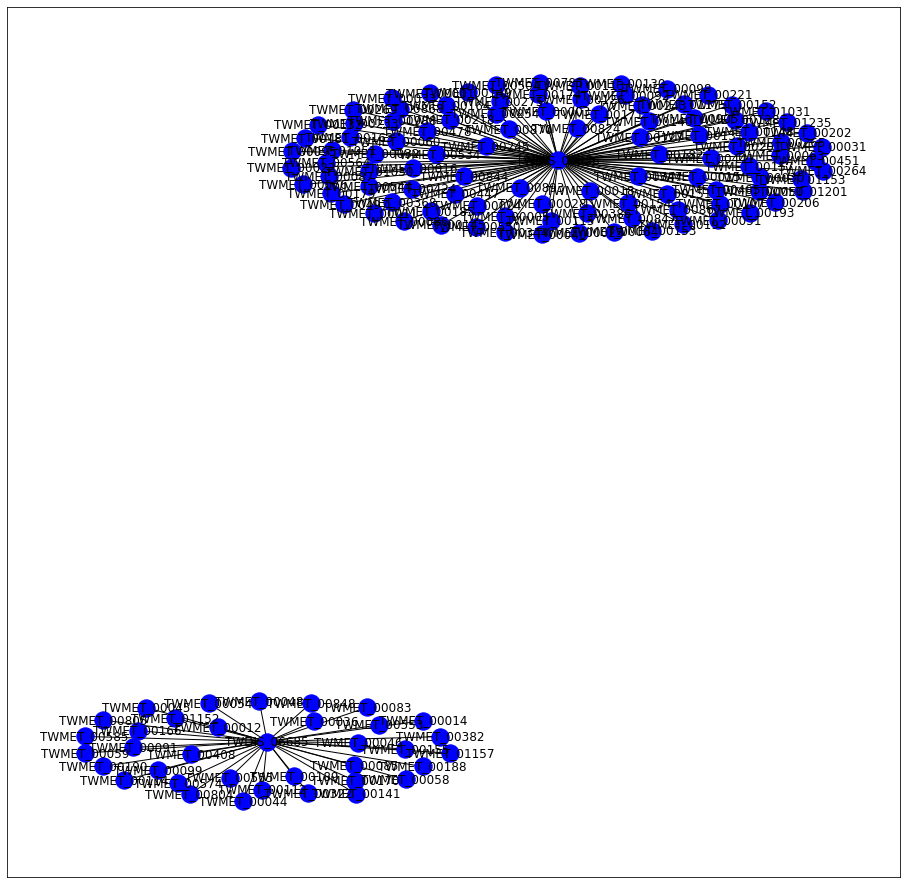

In [6]:
g = nx.from_pandas_edgelist(full_df, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')
plt.figure(5, figsize=(16, 16))
pos =nx.spring_layout(g)
nx.draw_networkx(g, node_color="blue" , pos=pos, with_labels = True)


In [7]:
# df_dm.iloc[:51,:]


/tmp/ipykernel_769659/3530431114.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


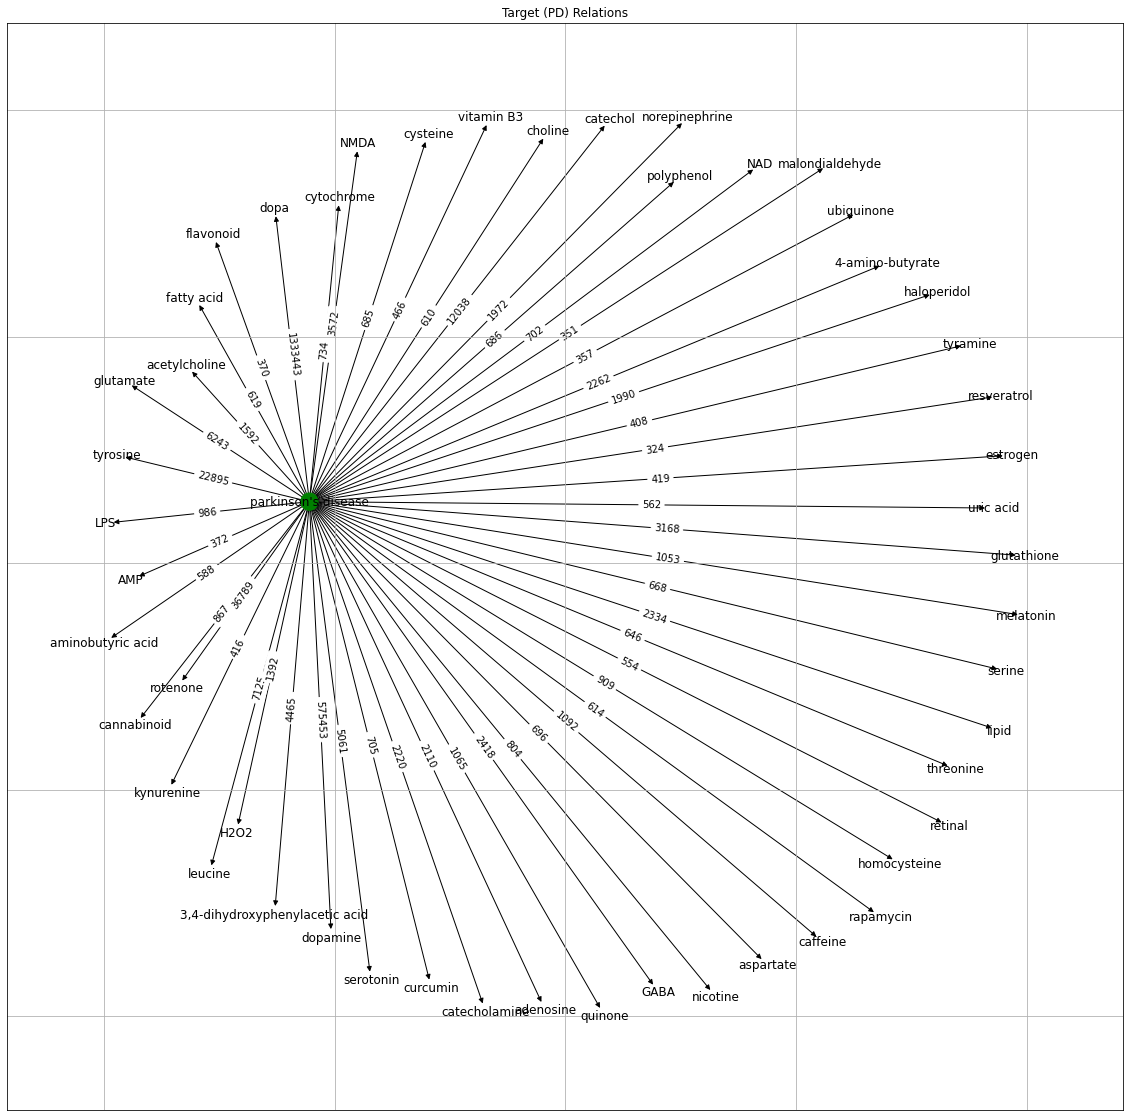

In [8]:
# convert positive parkinsons relations to graph
df_park = pd.read_csv('/homes/fabadmus/Internship/PDtest2/TWDIS_06685', sep='\t')

g = nx.from_pandas_edgelist(df_park.iloc[:51,:], "subject_annotated", "object_annotated", 'local_mi',
                            create_using=nx.DiGraph)
# plot the graph
plt.figure(10, figsize=(20, 20))
pos = nx.spring_layout(g, weight='local_mi', iterations=80)
# pos = nx.circular_layout(g)
color_map = ['green' if node.startswith("park") else 'none' for node in g.nodes] 
nx.draw_networkx(g, node_color=color_map , pos=pos)
nx.draw_networkx_edge_labels(g, 
pos=pos, 
edge_labels=nx.get_edge_attributes(g, 'local_mi'),
font_color="black",
);
plt.title('Target (PD) Relations')
plt.grid(b=None)
plt.show()

/tmp/ipykernel_769659/3511016344.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


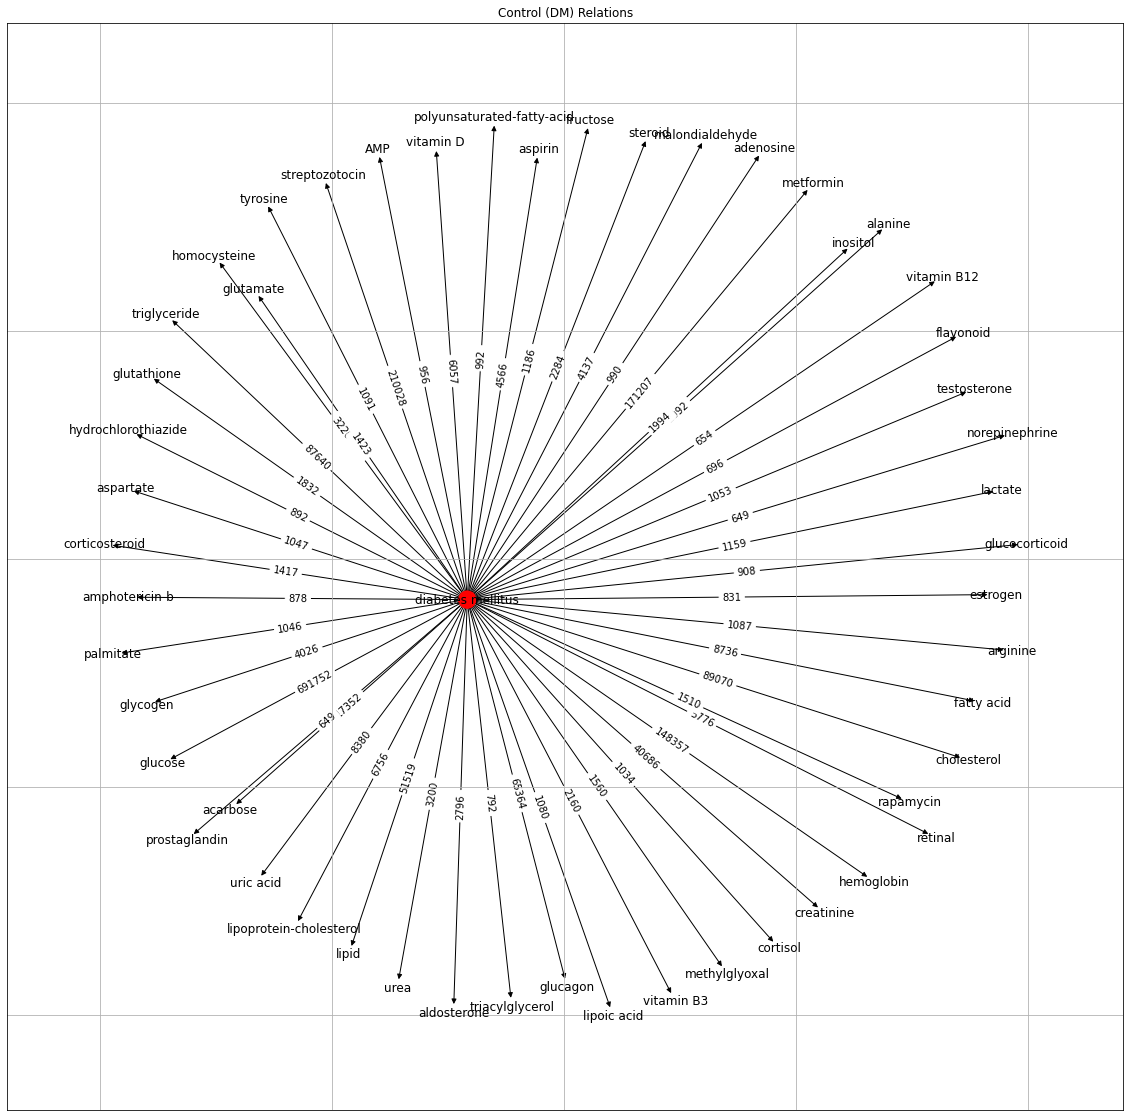

In [9]:
# convert positive parkinsons relations to graph
df_dm = pd.read_csv('/homes/fabadmus/Internship/PDtest2/TWDIS_09536', sep='\t')
g = nx.from_pandas_edgelist(df_dm.iloc[:51,:], "subject_annotated", "object_annotated", 'local_mi',
                            create_using=nx.DiGraph)
# plot the graph
plt.figure(10, figsize=(20, 20))
pos = nx.spring_layout(g, weight='local_mi', iterations=80)
# pos = nx.circular_layout(g)
color_map = ['red' if node.startswith("diab") else 'none' for node in g.nodes] 
nx.draw_networkx(g, node_color=color_map , pos=pos)
nx.draw_networkx_edge_labels(g, 
pos=pos, 
edge_labels=nx.get_edge_attributes(g, 'local_mi'),
font_color="black",
);
plt.title('Control (DM) Relations')
plt.grid(b=None)
plt.show()

In [10]:
second_layer = pd.read_csv('/homes/fabadmus/Internship/PDtest2/second_layer', sep='\t')
second_layer

,Unnamed: 0,subject,object,local_mi
0,0,TWMET_00001,TWMET_00011,596442
1,1,TWMET_00001,TWMET_00411,453310
2,2,TWMET_00002,TWMET_00003,1888164
3,3,TWMET_00002,TWMET_00011,1576366
4,4,TWMET_00003,TWMET_00011,4343986
...,...,...,...,...
17791,17791,TWMET_01235,TWMET_01030,360
17792,17792,TWMET_01235,TWMET_01100,4
17793,17793,TWMET_01235,TWMET_01151,7
17794,17794,TWMET_01235,TWMET_01158,18


/tmp/ipykernel_769659/1126731880.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


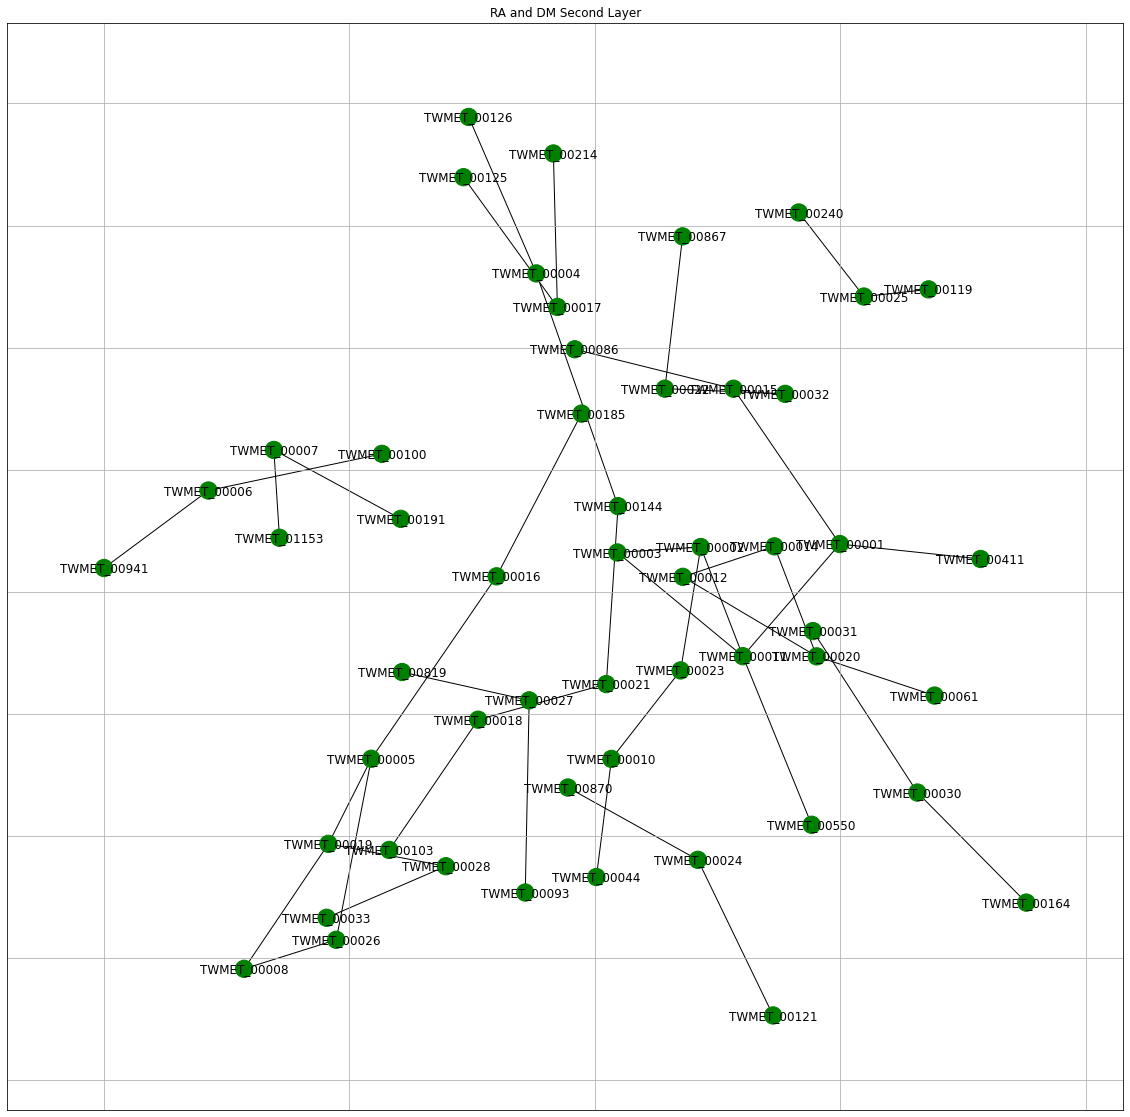

In [11]:
full_second_layer = pd.read_csv('/homes/fabadmus/Internship/PDtest2/second_layer', sep='\t')
g = nx.from_pandas_edgelist(full_second_layer.iloc[:51,:], source='subject',
                            target='object')
# plot the graph
plt.figure(10, figsize=(20, 20))
pos = nx.spring_layout(g, weight='local_mi', iterations=10)

#pos = nx.nx_agraph.graphviz_layout(g, prog="twopi", args="")
# test[test == '0'] = '#C6442A'
# test[test == '1'] = '#9E2AC6'
color_map = ['red' if node.startswith("TWDIS") else 'green' for node in g.nodes] 
nx.draw_networkx(g, node_color=color_map , pos=pos)
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=nx.get_edge_attributes(g, 'local_mi'), font_color="black",
);
plt.title('RA and DM Second Layer')
plt.grid(b=None)
plt.show()

In [12]:
# convert the second_layer into a graph
# second_layer = second_layer[second_layer.subject.str.startswith('TWDIS') == False]
G = nx.from_pandas_edgelist(full_second_layer, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')

In [13]:
# # load the embeddings of the graph


# embeddings = Word2Vec.load('/homes/fabadmus/Internship/PDtest2/embedding')

# # Convert embeddings to dataframe

# emb_df = (pd.DataFrame([embeddings.wv.get_vector(str(n))

#                         for n in G.nodes], index=G.nodes))

# #emb_df = (pd.DataFrame([embeddings.wv.get_vector]))

# emb_df.head(10)

In [14]:
embeddings = word2vec.KeyedVectors.load_word2vec_format('/homes/fabadmus/Internship/PDtest2/embedding.emb')
emb_df = (pd.DataFrame([embeddings.wv.get_vector(str(n))

                        for n in G.nodes()], index=G.nodes))

# emb_df = (pd.DataFrame([embeddings.wv.get_vector]))

emb_df.head(10)

/tmp/ipykernel_769659/1183813732.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  emb_df = (pd.DataFrame([embeddings.wv.get_vector(str(n))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TWMET_00001,3.859212,0.587967,-2.269445,-2.810783,0.480125,2.634712,-0.474447,-1.779017,-0.849405,0.455945,2.104634,0.312491,-1.662829,-1.792755,-1.366348,2.599131
TWMET_00011,1.900403,-0.428259,-3.525277,-1.590236,1.789066,2.915106,-1.797592,-2.549764,1.528644,2.697189,2.006520,-0.845219,0.977661,-1.480120,-0.884743,1.322969
TWMET_00411,3.067606,0.062890,-1.400425,-1.809691,0.016249,1.301739,0.331101,-0.978492,-0.514634,0.032236,0.336233,0.165951,-0.704057,-0.570365,-0.477923,2.472856
TWMET_00002,1.492506,0.916762,-2.833684,-0.109638,1.658896,2.610670,-1.312178,-2.722772,1.356113,1.942175,2.730238,-0.531696,0.032284,-2.131309,-1.456395,1.225791
TWMET_00003,2.052021,0.384023,-3.510180,-1.198286,1.647018,3.216445,-1.462891,-2.885435,1.312770,1.943751,1.812318,-0.896984,0.747459,-1.255527,-0.852893,0.815148
TWMET_00004,-0.323674,1.422694,-1.801120,-0.977116,0.729493,-1.159351,0.501936,-2.983460,2.365530,1.601951,4.401031,-1.454308,0.027717,-1.645601,-1.933703,2.279233
TWMET_00144,0.035290,1.450661,-1.403217,-0.338915,2.068250,-1.897292,0.670443,-2.400732,2.140310,1.290467,5.014047,-1.521070,0.710301,-1.329105,-1.428813,2.422652
TWMET_00126,-2.956601,1.955124,-2.237346,0.354164,-2.637289,-1.046878,0.288520,-3.252978,2.465064,2.122214,0.958001,-2.047598,0.665350,-2.612468,-1.633035,3.409717
TWMET_00005,1.023540,0.148757,-4.631317,0.199851,-0.897505,-0.834750,1.669901,1.819722,-1.447422,-2.918202,-0.019074,-1.713161,0.841312,1.358499,0.039680,-0.595360
TWMET_00026,2.364441,-1.589286,-4.619937,1.155910,-1.730693,-0.718492,2.046874,1.828708,-0.752174,-1.757914,0.371669,-0.638903,0.926360,0.681886,-1.482090,-0.770389


In [16]:
# get set of positive and negative concepts from the full data
pos = set(full_df[full_df['label'] == 'POS'].object)
neg = set(full_df[full_df['label'] == 'NEG'].object)

In [17]:
len(emb_df.loc[emb_df.index.isin(pos)])

35

In [18]:
emb_df.loc[emb_df.index.isin(pos), 'SET'] = 'POS'
emb_df.loc[emb_df.index.isin(neg), 'SET'] = 'NEG'
emb_df.loc[emb_df.SET.isnull(), 'SET'] = 'UNK'

In [19]:
len(emb_df.loc[emb_df.SET == 'UNK'])

166

In [20]:
len(emb_df.loc[emb_df.SET == 'POS'])

35

In [21]:
len(emb_df.loc[emb_df.SET == 'NEG'])

101

In [22]:
emb_df.loc[emb_df.SET == 'UNK']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,SET
TWMET_00411,3.067606,0.062890,-1.400425,-1.809691,0.016249,1.301739,0.331101,-0.978492,-0.514634,0.032236,0.336233,0.165951,-0.704057,-0.570365,-0.477923,2.472856,UNK
TWMET_00002,1.492506,0.916762,-2.833684,-0.109638,1.658896,2.610670,-1.312178,-2.722772,1.356113,1.942175,2.730238,-0.531696,0.032284,-2.131309,-1.456395,1.225791,UNK
TWMET_00004,-0.323674,1.422694,-1.801120,-0.977116,0.729493,-1.159351,0.501936,-2.983460,2.365530,1.601951,4.401031,-1.454308,0.027717,-1.645601,-1.933703,2.279233,UNK
TWMET_00144,0.035290,1.450661,-1.403217,-0.338915,2.068250,-1.897292,0.670443,-2.400732,2.140310,1.290467,5.014047,-1.521070,0.710301,-1.329105,-1.428813,2.422652,UNK
TWMET_00026,2.364441,-1.589286,-4.619937,1.155910,-1.730693,-0.718492,2.046874,1.828708,-0.752174,-1.757914,0.371669,-0.638903,0.926360,0.681886,-1.482090,-0.770389,UNK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWMET_00465,0.447881,-0.129652,0.266582,-0.379179,0.383173,0.289969,0.656308,-0.529347,-0.462780,0.089236,-0.094384,-0.191637,-1.076430,0.401444,-0.885469,-0.093136,UNK
TWMET_01173,0.254298,0.307889,-0.292124,0.164154,-0.667691,-0.972133,-0.286896,-0.080129,0.236804,-0.024197,0.337858,-0.636179,-0.696920,0.157620,0.223558,0.261583,UNK
TWMET_00840,2.225908,-0.580118,-0.721276,-0.381096,3.350671,-0.935336,2.089479,-0.941174,-0.671109,0.182794,-3.063685,0.543694,0.827313,2.106525,0.742226,1.802942,UNK
TWMET_00547,0.315145,-3.761193,0.220992,2.268654,1.883242,0.112504,3.174422,-3.437024,-2.918460,-1.611388,-0.140119,-2.245354,-0.257428,0.348081,0.495242,0.199196,UNK


In [23]:
# input and output variables
X = emb_df.iloc[:,:-1].values
y = emb_df['SET']
target_names = set(emb_df.SET.values)
# importing the requried module
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# initializing the model with 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
# fitting the dataset
X_r2 = lda.fit(X, y).transform(X)

In [24]:
colors = {'NEG':'red', 'POS' : 'green', 'UNK':'black'}

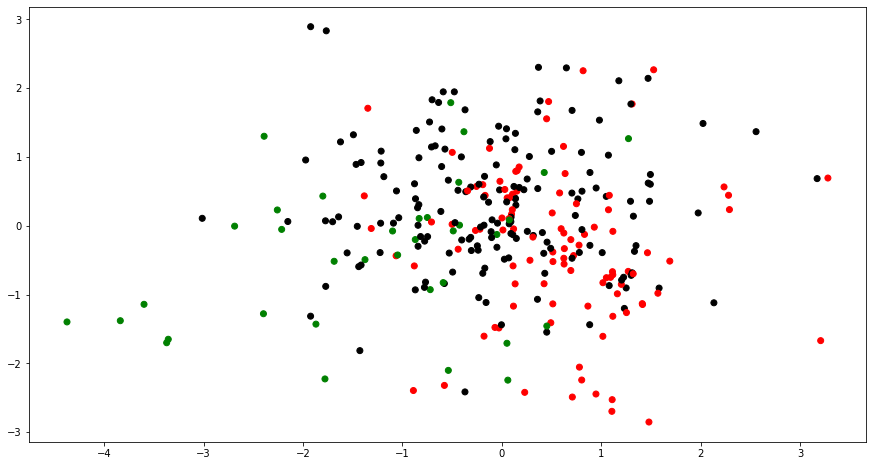

In [25]:
# importing the required module
import matplotlib.pyplot as plt
# plot size
plt.figure(figsize=(15, 8))
# plotting the graph
plt.scatter(X_r2[:,0],X_r2[:,1], c=emb_df['SET'].map(colors))

plt.show()

In [28]:
model_df = emb_df.loc[(emb_df.SET == 'POS') | (emb_df.SET == 'NEG')]
#training_embs.tail(50)

In [86]:
# # create separate dataframes of embeddings bases on the sets
# emb_df_pos = emb_df[emb_df.index.isin(pos)]
# emb_df_pos['set'] = 'POS'
# emb_df_neg = emb_df[emb_df.index.isin(neg)]
# emb_df_neg['set'] = 'NEG'

In [87]:
# # inspecting
# print(len(emb_df_pos))
# print(len(emb_df_neg))

In [29]:
# create a dataframe for the training from the labeled embeddings
# model_df = pd.concat([emb_df_pos, emb_df_neg])
model_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,SET
TWMET_00001,3.859212,0.587967,-2.269445,-2.810783,0.480125,2.634712,-0.474447,-1.779017,-0.849405,0.455945,2.104634,0.312491,-1.662829,-1.792755,-1.366348,2.599131,NEG
TWMET_00011,1.900403,-0.428259,-3.525277,-1.590236,1.789066,2.915106,-1.797592,-2.549764,1.528644,2.697189,2.006520,-0.845219,0.977661,-1.480120,-0.884743,1.322969,NEG
TWMET_00003,2.052021,0.384023,-3.510180,-1.198286,1.647018,3.216445,-1.462891,-2.885435,1.312770,1.943751,1.812318,-0.896984,0.747459,-1.255527,-0.852893,0.815148,NEG
TWMET_00126,-2.956601,1.955124,-2.237346,0.354164,-2.637289,-1.046878,0.288520,-3.252978,2.465064,2.122214,0.958001,-2.047598,0.665350,-2.612468,-1.633035,3.409717,NEG
TWMET_00005,1.023540,0.148757,-4.631317,0.199851,-0.897505,-0.834750,1.669901,1.819722,-1.447422,-2.918202,-0.019074,-1.713161,0.841312,1.358499,0.039680,-0.595360,NEG


In [30]:
# create validation data from the embedding data
# validation_df = pd.concat([emb_df_pos, emb_df_neg, emb_df]).drop_duplicates(
#     subset=emb_df.columns[:-1], keep=False)
validation_df = emb_df.loc[emb_df.SET == 'UNK']
validation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,SET
TWMET_00411,3.067606,0.062890,-1.400425,-1.809691,0.016249,1.301739,0.331101,-0.978492,-0.514634,0.032236,0.336233,0.165951,-0.704057,-0.570365,-0.477923,2.472856,UNK
TWMET_00002,1.492506,0.916762,-2.833684,-0.109638,1.658896,2.610670,-1.312178,-2.722772,1.356113,1.942175,2.730238,-0.531696,0.032284,-2.131309,-1.456395,1.225791,UNK
TWMET_00004,-0.323674,1.422694,-1.801120,-0.977116,0.729493,-1.159351,0.501936,-2.983460,2.365530,1.601951,4.401031,-1.454308,0.027717,-1.645601,-1.933703,2.279233,UNK
TWMET_00144,0.035290,1.450661,-1.403217,-0.338915,2.068250,-1.897292,0.670443,-2.400732,2.140310,1.290467,5.014047,-1.521070,0.710301,-1.329105,-1.428813,2.422652,UNK
TWMET_00026,2.364441,-1.589286,-4.619937,1.155910,-1.730693,-0.718492,2.046874,1.828708,-0.752174,-1.757914,0.371669,-0.638903,0.926360,0.681886,-1.482090,-0.770389,UNK


In [31]:
print(len(model_df))

136


In [32]:
# assign the independent and dependent variables
X = model_df.iloc[:,:-1].values
y = model_df['SET']

In [33]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:00<00:00, 34.07it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RidgeClassifierCV                  0.90               0.89    None      0.90   
RidgeClassifier                    0.90               0.89    None      0.90   
NearestCentroid                    0.85               0.87    None      0.86   
LinearDiscriminantAnalysis         0.88               0.87    None      0.88   
LogisticRegression                 0.88               0.87    None      0.88   
LinearSVC                          0.85               0.85    None      0.86   
PassiveAggressiveClassifier        0.85               0.83    None      0.85   
LGBMClassifier                     0.88               0.83    None      0.87   
SGDClassifier                      0.83               0.81    None      0.83   
DecisionTreeClassifier             0.85               0.81    None      0.85   
KNeighborsClassifier               0.85 

In [34]:
models = pd.DataFrame(models)
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.90,0.89,None,0.90,0.02
RidgeClassifier,0.90,0.89,None,0.90,0.06
NearestCentroid,0.85,0.87,None,0.86,0.01
LinearDiscriminantAnalysis,0.88,0.87,None,0.88,0.04
LogisticRegression,0.88,0.87,None,0.88,0.03
LinearSVC,0.85,0.85,None,0.86,0.02
PassiveAggressiveClassifier,0.85,0.83,None,0.85,0.01
LGBMClassifier,0.88,0.83,None,0.87,0.03
SGDClassifier,0.83,0.81,None,0.83,0.01


## ADABOOST

In [94]:
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8048780487804879


In [95]:
# predict unknowns
X_val = validation_df.iloc[:,:-1]
unk_pred_ada = model.predict(X_val)

In [96]:
val_proba = model.predict_proba(X_val)

In [97]:
# convert predictions and actual values to dataframe
val_proba_df = pd.DataFrame(val_proba, index=X_val.index,
                                columns=['NEG_prob', 'POS_prob'])
val_proba_df['predictions'] =unk_pred_ada
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df

,NEG_prob,POS_prob,predictions
TWMET_00105,0.34,0.66,POS
TWMET_00772,0.37,0.63,POS
TWMET_00173,0.38,0.62,POS
TWMET_01184,0.38,0.62,POS
TWMET_01043,0.39,0.61,POS
...,...,...,...
TWMET_00411,0.78,0.22,NEG
TWMET_00002,0.78,0.22,NEG
TWMET_00547,0.79,0.21,NEG
TWMET_00039,0.80,0.20,NEG


In [98]:
session = requests.Session()
base_url = 'https://apimlqv2.tenwiseservice.nl/api/mlquery/'
session.headers['referer'] = 'https://apimlqv2.tenwiseservice.nl'
session.get(f"{base_url}start/")

payload = {'apikey': '',
           'csrfmiddlewaretoken': session.cookies.get_dict()['csrftoken']}

# annotate predictions
ids = list(val_proba_df.index)
payload['concept_ids'] = ",".join(ids)
results = session.post(f"{base_url}conceptset/annotation/", payload)
js = results.json()
annotation = js['result']['annotation']
# get ids
annotated_ids = []
for id in ids:
    annotated_ids.extend(annotation[id]['name'])
# add ids to the dataframe
val_proba_df['annotation'] = annotated_ids
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df.head(20)

,NEG_prob,POS_prob,predictions,annotation
TWMET_00105,0.34,0.66,POS,glutamine
TWMET_00772,0.37,0.63,POS,5-methoxytryptamine
TWMET_00173,0.38,0.62,POS,melatonin
TWMET_01184,0.38,0.62,POS,sulpiride
TWMET_01043,0.39,0.61,POS,methionine sulfoximine
TWMET_00575,0.39,0.61,POS,3-hydroxykynurenine
TWMET_00584,0.39,0.61,POS,kynurenic acid
TWMET_00552,0.40,0.60,POS,tryptamine
TWMET_01100,0.41,0.59,POS,octopamine
TWMET_00991,0.41,0.59,POS,hydroquinone


## Random Forest

In [26]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42) 

In [27]:
param_grid = {'min_samples_leaf':[3,5,7,10,15],'max_features':[0.5,'sqrt','log2'],
          'max_depth':[10,15,20],
          'class_weight':[{"POS":3,"NEG":1},{"POS":1,"NEG":1}],
          'criterion':['entropy','gini']}


model1 = GridSearchCV(RandomForestClassifier(),param_grid, verbose=1,n_jobs=-1,scoring='roc_auc')
model1.fit(X_train,y_train)
print ('\n',model1.best_estimator_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for the


 RandomForestClassifier(class_weight={'NEG': 1, 'POS': 3}, criterion='entropy',
                       max_depth=10, max_features=0.5, min_samples_leaf=3)


In [101]:
pred1 = model1.predict(X_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

         NEG       0.88      0.94      0.91        31
         POS       0.75      0.60      0.67        10

    accuracy                           0.85        41
   macro avg       0.81      0.77      0.79        41
weighted avg       0.85      0.85      0.85        41



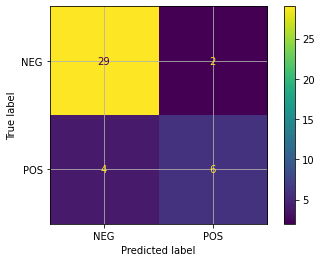

In [102]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)
plt.grid(b=None)
plt.show()

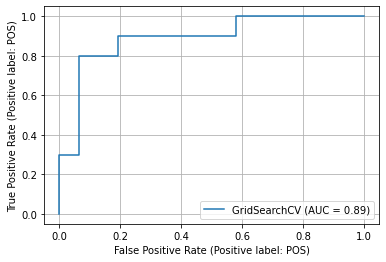

In [103]:
metrics.plot_roc_curve(model1, X_test, y_test)
plt.grid(b=None)

## Random Forest without Paramter tuning

In [35]:
model2 = RandomForestClassifier(random_state=42)

model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
pred2 = model2.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

         NEG       0.85      1.00      0.92        28
         POS       1.00      0.62      0.76        13

    accuracy                           0.88        41
   macro avg       0.92      0.81      0.84        41
weighted avg       0.90      0.88      0.87        41



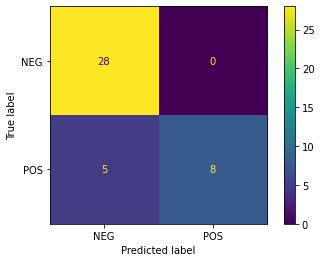

In [38]:
plot_confusion_matrix(model2, X_test, y_test)

plt.show()

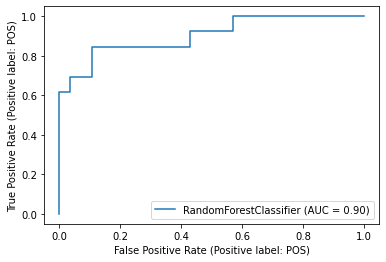

In [39]:
metrics.plot_roc_curve(model2, X_test, y_test)


## Unknown Set Predictions

In [40]:
# predict unknowns
X_val = validation_df.iloc[:,:-1]
unk_pred = model2.predict(X_val)

In [41]:
val_proba = model2.predict_proba(X_val)

In [42]:
# convert predictions and actual values to dataframe
val_proba_df = pd.DataFrame(val_proba, index=X_val.index,
                                columns=['NEG_prob', 'POS_prob'])
val_proba_df['predictions'] =unk_pred
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df

,NEG_prob,POS_prob,predictions
TWMET_00191,0.28,0.72,POS
TWMET_00577,0.33,0.67,POS
TWMET_00991,0.34,0.66,POS
TWMET_00554,0.35,0.65,POS
TWMET_01184,0.39,0.61,POS
...,...,...,...
TWMET_00056,0.98,0.02,NEG
TWMET_00410,0.98,0.02,NEG
TWMET_00120,0.98,0.02,NEG
TWMET_00840,0.99,0.01,NEG


In [43]:
session = requests.Session()
base_url = 'https://apimlqv2.tenwiseservice.nl/api/mlquery/'
session.headers['referer'] = 'https://apimlqv2.tenwiseservice.nl'
session.get(f"{base_url}start/")

payload = {'apikey': '',
           'csrfmiddlewaretoken': session.cookies.get_dict()['csrftoken']}

# annotate predictions
ids = list(val_proba_df.index)
payload['concept_ids'] = ",".join(ids)
results = session.post(f"{base_url}conceptset/annotation/", payload)
js = results.json()
annotation = js['result']['annotation']
# get ids
annotated_ids = []
for id in ids:
    annotated_ids.extend(annotation[id]['name'])
# add ids to the dataframe
val_proba_df['annotation'] = annotated_ids
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df.head(20)

,NEG_prob,POS_prob,predictions,annotation
TWMET_00191,0.28,0.72,POS,retinoid
TWMET_00577,0.33,0.67,POS,indole-3-acetic acid
TWMET_00991,0.34,0.66,POS,hydroquinone
TWMET_00554,0.35,0.65,POS,ubiquinol
TWMET_01184,0.39,0.61,POS,sulpiride
TWMET_00717,0.40,0.60,POS,3-methoxytyramine
TWMET_00096,0.41,0.59,POS,benzene
TWMET_00224,0.42,0.58,POS,chlorpheniramine
TWMET_00006,0.42,0.58,POS,tyrosine
TWMET_01100,0.42,0.58,POS,octopamine


In [44]:
pd.DataFrame.to_csv(val_proba_df, '/homes/fabadmus/Internship/grad_project/first_emb_result', sep='\t')
val_proba_df

,NEG_prob,POS_prob,predictions,annotation
TWMET_00191,0.28,0.72,POS,retinoid
TWMET_00577,0.33,0.67,POS,indole-3-acetic acid
TWMET_00991,0.34,0.66,POS,hydroquinone
TWMET_00554,0.35,0.65,POS,ubiquinol
TWMET_01184,0.39,0.61,POS,sulpiride
...,...,...,...,...
TWMET_00056,0.98,0.02,NEG,vitamin D
TWMET_00410,0.98,0.02,NEG,globin
TWMET_00120,0.98,0.02,NEG,tetracycline
TWMET_00840,0.99,0.01,NEG,canrenone


## Predictions for whole network

In [45]:
# make predictions on the unknown
#X_val = validation_df.iloc[:,:-1]
X_val = emb_df.iloc[:,:-1]
pred = model2.predict(X_val)

In [46]:
val_proba = model2.predict_proba(X_val)

In [47]:
# convert predictions and actual values to dataframe
val_proba_df = pd.DataFrame(val_proba, index=X_val.index,
                                columns=['NEG_prob', 'POS_prob'])
val_proba_df['predictions'] = pred
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df

,NEG_prob,POS_prob,predictions
TWMET_00058,0.08,0.92,POS
TWMET_00322,0.10,0.90,POS
TWMET_00804,0.11,0.89,POS
TWMET_00805,0.17,0.83,POS
TWMET_00382,0.18,0.82,POS
...,...,...,...
TWMET_00157,0.99,0.01,NEG
TWMET_01030,1.00,0.00,NEG
TWMET_00935,1.00,0.00,NEG
TWMET_00140,1.00,0.00,NEG


In [48]:
val_proba_df.index.names = ['ID']

In [49]:
emb_df.index.names = ['ID']


In [50]:
emb_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,SET
ID,,,,,,,,,,,,,,,,,
TWMET_00001,3.86,0.59,-2.27,-2.81,0.48,2.63,-0.47,-1.78,-0.85,0.46,2.10,0.31,-1.66,-1.79,-1.37,2.60,NEG
TWMET_00011,1.90,-0.43,-3.53,-1.59,1.79,2.92,-1.80,-2.55,1.53,2.70,2.01,-0.85,0.98,-1.48,-0.88,1.32,NEG
TWMET_00411,3.07,0.06,-1.40,-1.81,0.02,1.30,0.33,-0.98,-0.51,0.03,0.34,0.17,-0.70,-0.57,-0.48,2.47,UNK
TWMET_00002,1.49,0.92,-2.83,-0.11,1.66,2.61,-1.31,-2.72,1.36,1.94,2.73,-0.53,0.03,-2.13,-1.46,1.23,UNK
TWMET_00003,2.05,0.38,-3.51,-1.20,1.65,3.22,-1.46,-2.89,1.31,1.94,1.81,-0.90,0.75,-1.26,-0.85,0.82,NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWMET_01157,0.13,0.02,-0.29,0.06,-0.03,0.10,0.45,-0.27,-0.25,-0.06,-0.13,-0.12,-0.40,0.76,-0.35,0.32,POS
TWMET_00840,2.23,-0.58,-0.72,-0.38,3.35,-0.94,2.09,-0.94,-0.67,0.18,-3.06,0.54,0.83,2.11,0.74,1.80,UNK
TWMET_01201,0.30,-4.09,0.03,2.46,1.98,0.01,3.28,-3.70,-3.16,-1.63,-0.31,-2.50,-0.11,0.45,0.36,0.46,NEG


In [51]:
# sourcery skip: avoid-builtin-shadow
predictions_df = pd.merge(emb_df['SET'],val_proba_df, how = 'left', on = 'ID')
predictions_df

,SET,NEG_prob,POS_prob,predictions
ID,,,,
TWMET_00001,NEG,0.92,0.08,NEG
TWMET_00011,NEG,0.96,0.04,NEG
TWMET_00411,UNK,0.90,0.10,NEG
TWMET_00002,UNK,0.97,0.03,NEG
TWMET_00003,NEG,0.94,0.06,NEG
...,...,...,...,...
TWMET_01157,POS,0.34,0.66,POS
TWMET_00840,UNK,0.99,0.01,NEG
TWMET_01201,NEG,0.90,0.10,NEG


In [52]:
len(predictions_df.index)

302

In [53]:
session = requests.Session()
base_url = 'https://apimlqv2.tenwiseservice.nl/api/mlquery/'
session.headers['referer'] = 'https://apimlqv2.tenwiseservice.nl'
session.get(f"{base_url}start/")

payload = {'apikey': '',
           'csrfmiddlewaretoken': session.cookies.get_dict()['csrftoken']}

# annotate predictions
ids = list(predictions_df.index)
payload['concept_ids'] = ",".join(ids)
results = session.post(f"{base_url}conceptset/annotation/", payload)
js = results.json()
annotation = js['result']['annotation']
# get ids
annotated_ids = []
for id in ids:
    annotated_ids.extend(annotation[id]['name'])
# add ids to the dataframe
predictions_df['annotation'] = annotated_ids
predictions_df = predictions_df.sort_values('POS_prob', ascending=False)
predictions_df.head(10)

,SET,NEG_prob,POS_prob,predictions,annotation
ID,,,,,
TWMET_00058,POS,0.08,0.92,POS,GABA
TWMET_00322,POS,0.10,0.90,POS,4-amino-butyrate
TWMET_00804,POS,0.11,0.89,POS,aminobutyric acid
TWMET_00805,POS,0.17,0.83,POS,aminobutyric acid
TWMET_00382,POS,0.18,0.82,POS,cytochrome
TWMET_01152,POS,0.19,0.81,POS,retinoic acid
TWMET_00555,POS,0.20,0.80,POS,ubiquinone
TWMET_00083,POS,0.20,0.80,POS,NMDA
TWMET_00141,POS,0.21,0.79,POS,indole


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


Text(0.5, 0, 'Probability of having a relation to PD')

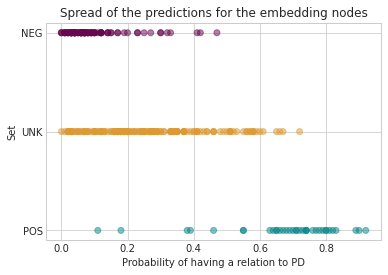

In [60]:
colors = {"POS":'#05878a', "NEG":'#67074e', "UNK":'#dd9933'}

plt.scatter(predictions_df.POS_prob, predictions_df.SET, alpha=0.5, c=predictions_df.SET.map(colors))
plt.title('Spread of the predictions for the embedding nodes')
plt.ylabel('Set')
plt.xlabel('Probability of having a relation to PD')

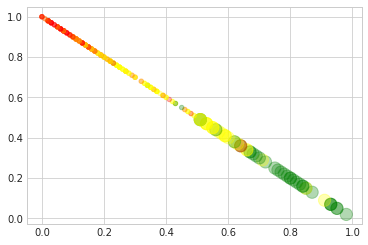

In [104]:
colors = {"POS":'green', "NEG":'red', "UNK":'yellow'}
sizes = {"POS":150, "NEG":20}
plt.scatter(predictions_df.POS_prob, predictions_df.NEG_prob, c=predictions_df.SET.map(colors), s=predictions_df.predictions.map(sizes),alpha=0.3, cmap='viridis')

(array([61., 76., 54., 35., 17., 18., 15.,  8., 11.,  7.]),
 array([0.   , 0.098, 0.196, 0.294, 0.392, 0.49 , 0.588, 0.686, 0.784,
        0.882, 0.98 ]),
 <BarContainer object of 10 artists>)

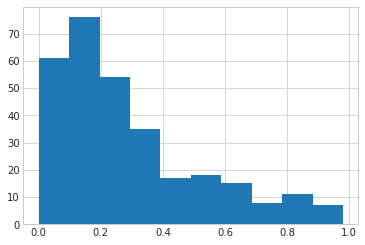

In [105]:
colors = {"POS":'green', "NEG":'red', "UNK":'yellow'}
plt.hist(
    predictions_df.POS_prob,
    label=predictions_df.predictions,

)